In [1]:
import torch
import torch.nn as nn

batch_size = 2
seq_len = 5
d_model = 512
num_heads = 8
d_k = d_model // num_heads


# Example innput 
X = torch.rand(batch_size, seq_len, d_model)

In [10]:
# testing the linear layer with different shape
Y= torch.rand(512,)
print(Y.shape)
W_Y_test = nn.Linear(d_model, d_model)
Y_test = W_Y_test(Y)
print(Y_test.shape)

torch.Size([512])
torch.Size([512])


In [11]:
# Creating the learned linear Q, K, V matrices

W_Q = nn.Linear(d_model, d_model)
W_K = nn.Linear(d_model, d_model)
W_V = nn.Linear(d_model, d_model)

# Final output projection
W_O = nn.Linear(d_model, d_model)

# Project input 
Q = W_Q(X) # (batch_size, seq_len, d_model)
K = W_K(X) # (batch_size, seq_len, d_model)
V = W_V(X) # (batch_size, seq_len, d_model)

(print(Q.shape, K.shape, V.shape))

torch.Size([2, 5, 512]) torch.Size([2, 5, 512]) torch.Size([2, 5, 512])


In [12]:
# Split into heads 
Q = Q.view(batch_size, seq_len, num_heads, d_k).transpose(1, 2) # (batch_size, num_heads, seq_len, d_k)
K = K.view(batch_size, seq_len, num_heads, d_k).transpose(1, 2) # (batch_size, num_heads, seq_len, d_k)
V = V.view(batch_size, seq_len, num_heads, d_k).transpose(1, 2) # (batch_size, num_heads, seq_len, d_k)

In [13]:
scores = torch.matmul(Q, K.transpose(-2, -1)) / (d_k ** 0.5)  # (batch_size, seq_len, seq_len)
print(scores.shape)

torch.Size([2, 8, 5, 5])


In [55]:
weights = torch.softmax(scores, dim = -1)
print(weights.shape)
heads = torch.matmul(weights, V)  
heads.shape

torch.Size([2, 8, 5, 5])


torch.Size([2, 8, 5, 64])

In [ ]:
# Concatenate heads
heads = heads.transpose(1, 2).contiguous().view(batch_size, seq_len, d_model)  # (batch_size, seq_len, d_model)
heads.shape   

torch.Size([2, 5, 512])

In [58]:
import torch
import matplotlib.pyplot as plt

# Make a fake "heads" tensor with easy to track values
B, H, L, d_k = 1, 2, 3, 4  # tiny so you can see it!

heads = torch.arange(B * H * L * d_k).reshape(B, H, L, d_k)

print("Original heads:")
print(heads)


Original heads:
tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],

         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]])


In [59]:
# Correct: transpose before merging
heads_T = heads.transpose(1, 2)  # swap heads and seq_len

print("\nAfter transpose:")
print(heads_T)



After transpose:
tensor([[[[ 0,  1,  2,  3],
          [12, 13, 14, 15]],

         [[ 4,  5,  6,  7],
          [16, 17, 18, 19]],

         [[ 8,  9, 10, 11],
          [20, 21, 22, 23]]]])


In [60]:
# Correct flatten: after transpose
correct_flat = heads_T.contiguous().view(B, L, H * d_k)

# Incorrect flatten: skip transpose
wrong_flat = heads.contiguous().view(B, L, H * d_k)

print("\nCorrect flatten:")
print(correct_flat)

print("\nWrong flatten:")
print(wrong_flat)



Correct flatten:
tensor([[[ 0,  1,  2,  3, 12, 13, 14, 15],
         [ 4,  5,  6,  7, 16, 17, 18, 19],
         [ 8,  9, 10, 11, 20, 21, 22, 23]]])

Wrong flatten:
tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7],
         [ 8,  9, 10, 11, 12, 13, 14, 15],
         [16, 17, 18, 19, 20, 21, 22, 23]]])


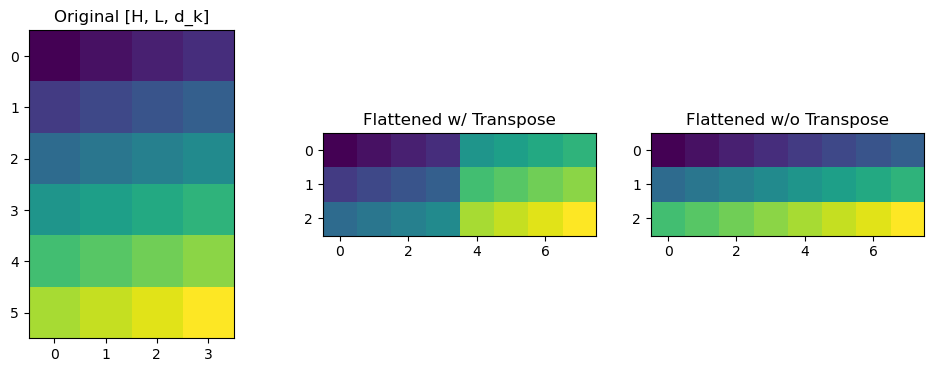

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(heads[0].reshape(H * L, d_k), cmap="viridis")
axes[0].set_title("Original [H, L, d_k]")

axes[1].imshow(correct_flat[0], cmap="viridis")
axes[1].set_title("Flattened w/ Transpose")

axes[2].imshow(wrong_flat[0], cmap="viridis")
axes[2].set_title("Flattened w/o Transpose")

plt.show()


In [16]:
s1 = torch.tensor([1, 2, 3])
print(s1.shape)
sm = s1.unsqueeze(1)  # Add batch dimension
print(sm.shape)

torch.Size([3])
torch.Size([3, 1])
